In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data = pd.read_csv("https://www.dropbox.com/s/6qcgvoc6h8y8zb2/CreditCardDefault.csv?dl=1")
data.head(10)
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [2]:
from sklearn.model_selection import train_test_split # tran and test data split 
from sklearn.svm import SVC #Support Vector Machine  
from sklearn.metrics import roc_auc_score # ROC and AUC 
from sklearn.metrics import accuracy_score # Accuracy 
from sklearn.metrics import recall_score # Recall 
from sklearn.metrics import precision_score # Prescison 
from sklearn.metrics import classification_report # Classification Score Report 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
%matplotlib inline 

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.sample(10, random_state = 10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
168367,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
110270,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
243562,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
74702,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
98416,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0
212338,138816.0,2.288281,-0.575108,-2.600038,-1.321918,0.676592,-0.634091,0.188543,-0.407708,-1.205919,...,0.329349,0.929055,-0.263408,-1.368466,0.595599,0.147629,-0.081825,-0.101908,29.50,0
1111,862.0,1.174297,0.180652,0.513432,0.450884,-0.197997,-0.186938,-0.090465,0.056595,-0.281111,...,-0.173352,-0.484003,0.148174,0.024041,0.128743,0.105541,-0.013716,0.006335,1.98,0
67432,52532.0,0.797464,-0.947293,1.045822,0.263474,-1.194980,0.348919,-0.594826,0.268371,0.870239,...,-0.039739,-0.211713,-0.023972,0.313647,-0.045046,0.924183,-0.049685,0.031583,170.82,0
217694,140993.0,0.173434,0.537613,-1.402600,-1.207961,1.372947,-0.853390,1.228633,-0.161861,-0.088163,...,0.263755,0.610335,-0.195470,0.168414,-0.417200,0.036799,-0.065378,0.070726,19.29,0
170506,120210.0,-1.111080,0.298477,0.611207,-2.660377,0.214494,0.072039,-0.125610,0.611208,-1.315181,...,0.129615,0.145834,-0.567235,-1.387596,0.968292,-0.078106,0.109571,-0.012369,14.95,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe(include = "all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
print("Is the data containing any missing values: {}".format(data.isnull().sum().any()))

Is the data containing any missing values: False


In [9]:
data['Class'] = data['Class'].astype('str')
sample_data = data.sample(60000)

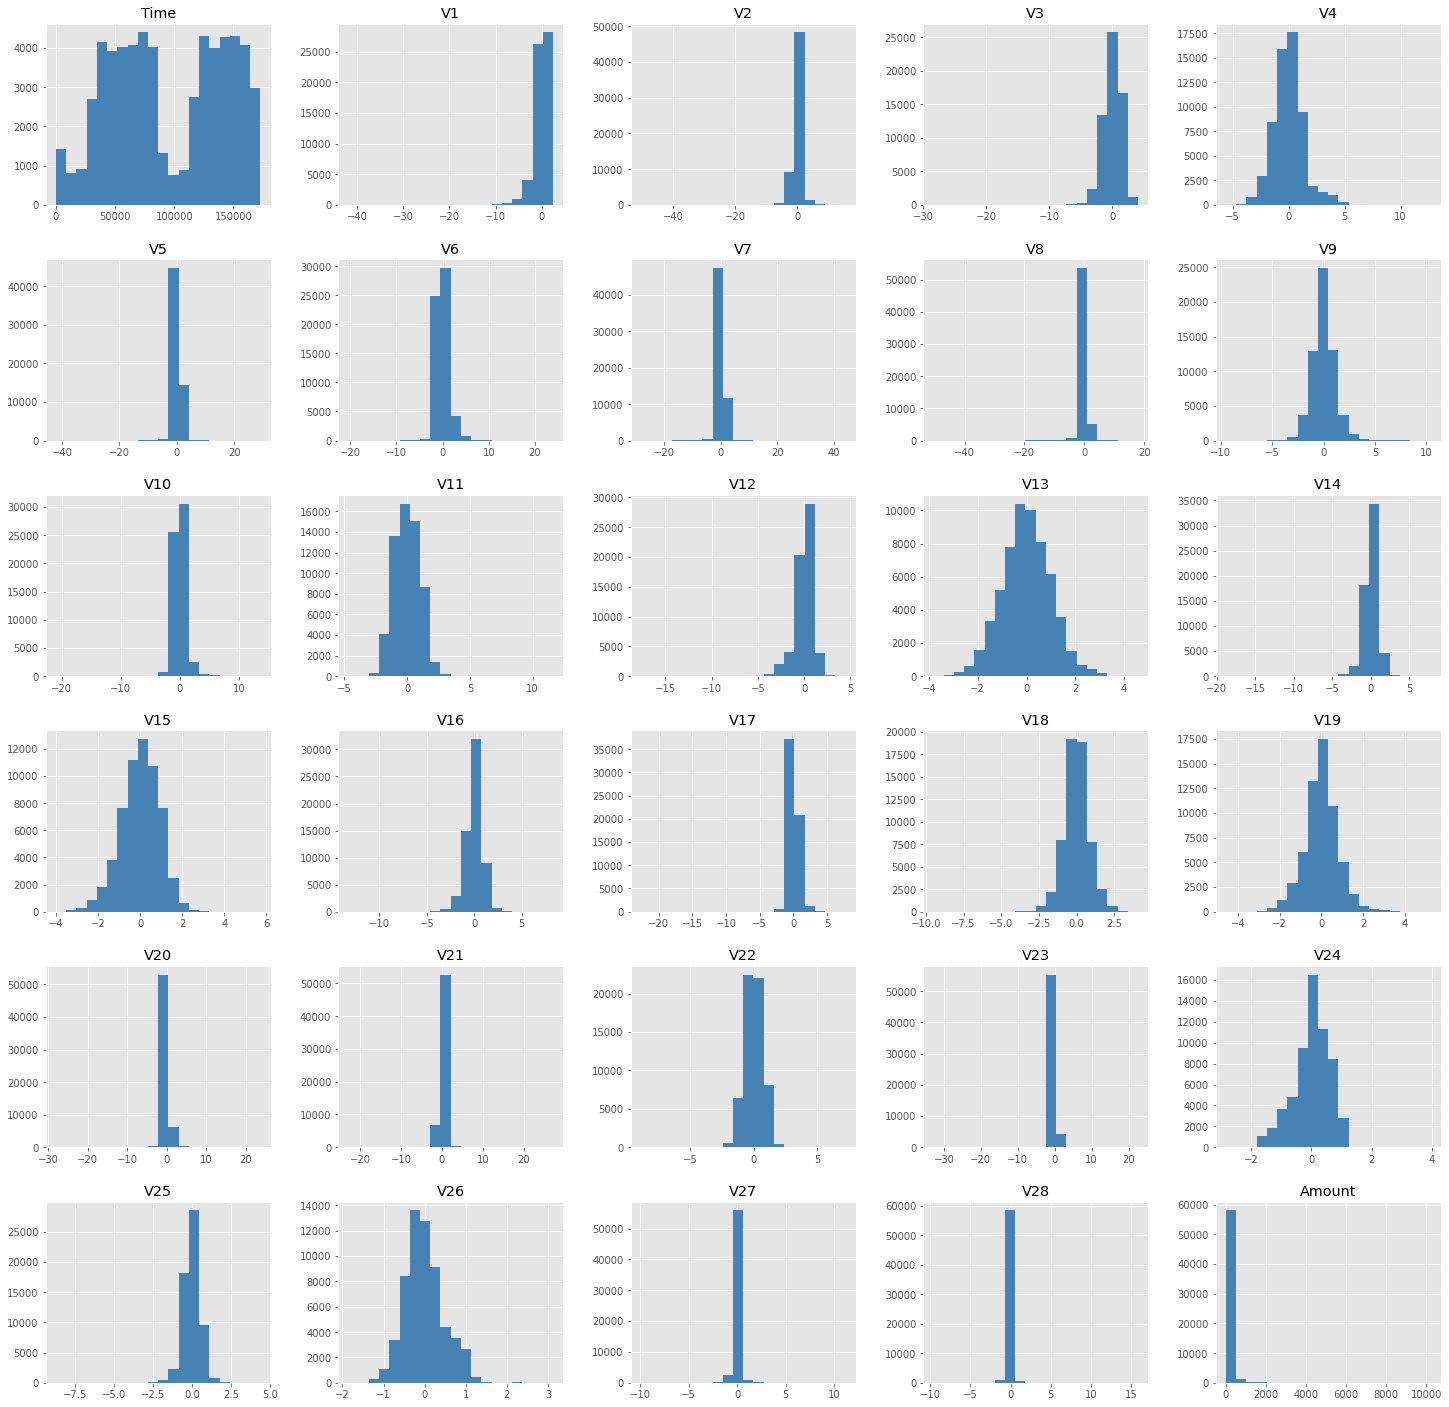

In [10]:
plt.style.use('ggplot')
sample_data.hist(figsize = (25, 25), color = 'steelblue', bins = 20)
plt.show()

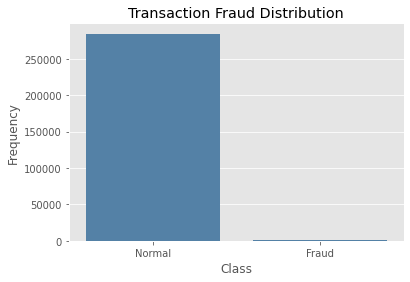

In [11]:
sns.countplot(x = 'Class', data = data, color = 'steelblue')
plt.title("Transaction Fraud Distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.ylabel("Frequency")
plt.show()

In [12]:
# Print the count for fraud and non-fraud transactions
data["Class"].value_counts(sort = True)

0    284315
1       492
Name: Class, dtype: int64

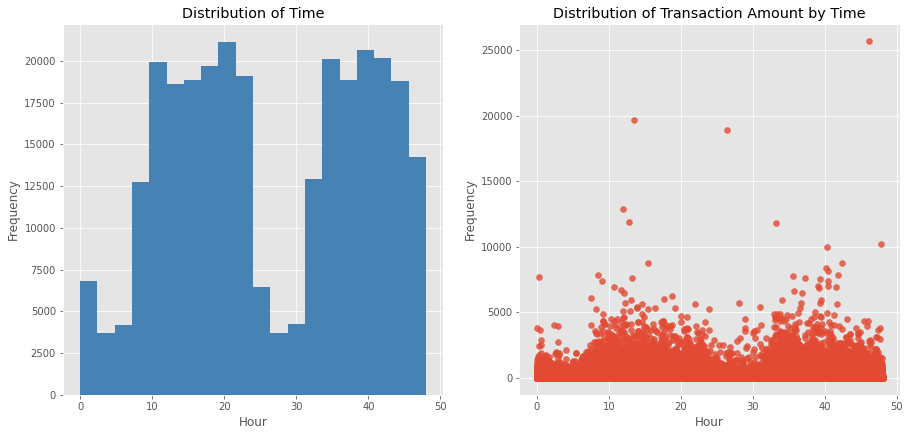

In [13]:
# Time distribution in hours and with Transaction Amount 
plt.subplot(2, 2, 1)
(data['Time']/3600).hist(figsize=(15,15), color = "steelblue", bins = 20)
plt.title("Distribution of Time")
plt.xlabel("Hour")
plt.ylabel("Frequency")

# Transaction amount distribution by hours
plt.subplot(2, 2, 2)
plt.scatter(x = data['Time']/3600, y = data['Amount'], alpha = .8)
plt.title("Distribution of Transaction Amount by Time")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.show()

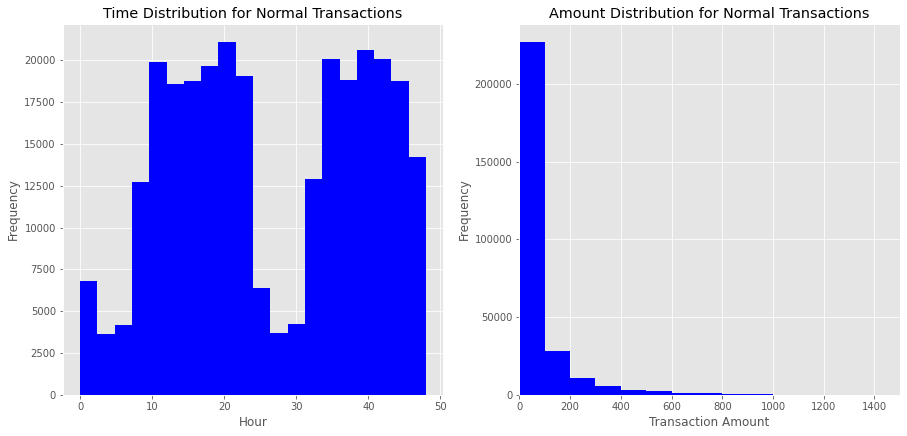

In [14]:
# For Normal Transactions
# Look at the time distribution
plt.subplot(2, 2, 1)
(data[data['Class'] == '0']['Time']/3600).hist(figsize=(15, 15), bins = 20, color = 'blue')
plt.title("Time Distribution for Normal Transactions")
plt.xlabel("Hour")
plt.ylabel("Frequency")

# Transaction Amount Distribution
plt.subplot(2, 2, 2)
data[data['Class'] == "0"]['Amount'].hist(bins = [0, 100, 200, 300, 400 ,500, 600, 700, 800, 900, 1000], color = 'blue')
plt.title("Amount Distribution for Normal Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.xlim(0, 1500)
plt.show()

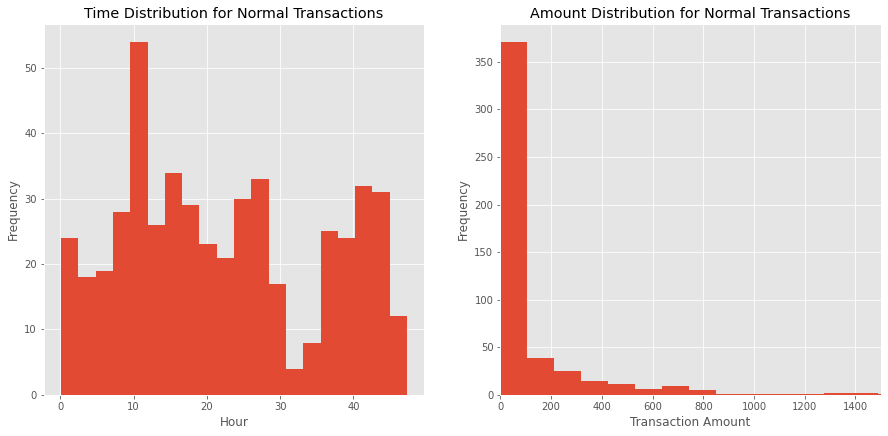

In [15]:
# For Fraud Transactions
# Look at the time distribution
plt.subplot(2, 2, 1)
(data[data['Class'] == '1']['Time']/3600).hist(figsize=(15, 15), bins = 20)
plt.title("Time Distribution for Normal Transactions")
plt.xlabel("Hour")
plt.ylabel("Frequency")

# Transaction Amount Distribution
plt.subplot(2, 2, 2)
data[data['Class'] == "1"]['Amount'].hist(bins = 20)
plt.title("Amount Distribution for Normal Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.xlim(0, 1500)
plt.show()

In [16]:
# Correlation Plot for all numeric variables
corr = data.corr()
corr.style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.227709
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.531409
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.210880
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.098732
V5,0.173072,-0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.386356
V6,-0.063016,-0.000000,0.000000,-0.000000,0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.215981
V7,0.084714,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.397311
V8,-0.036949,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.103079
V9,-0.008660,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.044246


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Make the X and Y inputs
x = data.drop('Class', axis = 1)
y = data['Class']

# Split the data into training and testing, use 30% data to evaluate the models 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 123)

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

print("Training data has {} rows and {} variables".format(train_x.shape[0], train_x.shape[1]))
print("Testing data has {} rows and {} variables".format(test_x.shape[0], test_x.shape[1]))

Training data has 199364 rows and 30 variables
Testing data has 85443 rows and 30 variables


In [18]:
# Radial kernel will be used as the kernel function 
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
svc = SVC(kernel='rbf', C = 1, gamma='scale')
svc.fit(train_x, train_y)

pred_y_svc = svc.predict(test_x)

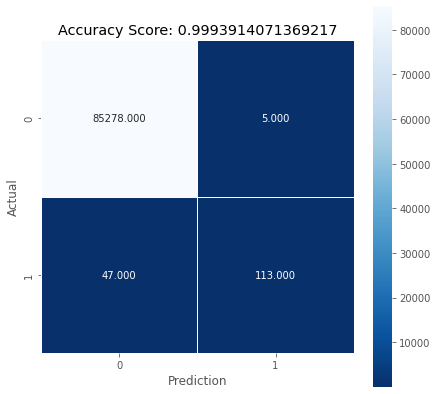

In [19]:
# Print the confusion matrix for the model 
conf_matrix = confusion_matrix(test_y, pred_y_svc)

plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.title("Accuracy Score: {}".format(accuracy_score(test_y, pred_y_svc)))
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [20]:
# Generate the Recall and Prescision scores for the predictions 
print("The recall score for prediction is {:0.2f}".format(recall_score(test_y, pred_y_svc, pos_label='1')))
print("The prescision score for predion is {:0.2f}".format(precision_score(test_y, pred_y_svc, pos_label='1')))
print("\n")
print(classification_report(test_y, pred_y_svc))

The recall score for prediction is 0.71
The prescision score for predion is 0.96


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.96      0.71      0.81       160

    accuracy                           1.00     85443
   macro avg       0.98      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall curve for Support Vector Classifier')

<Figure size 504x504 with 0 Axes>

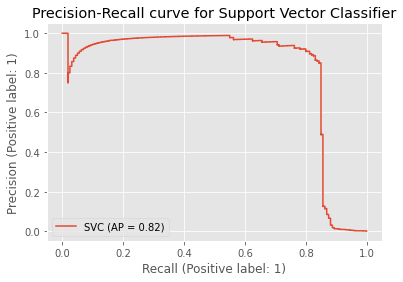

In [21]:
# Print out the Recall-Precision Plot
plt.figure(figsize = (7,7))
plot_precision_recall_curve(svc, test_x, test_y)
plt.title("Precision-Recall curve for Support Vector Classifier")